In [1]:
import pandas as pd
import numpy as np
import json
import requests
import pprint
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [2]:
engine = create_engine('sqlite:///data.sqlite')

In [3]:
conn = engine.connect()

In [4]:
fire_size_cause_df = pd.read_sql("SELECT FIRE_SIZE, NWCG_CAUSE_CLASSIFICATION FROM fires", conn)
fire_size_cause_df = fire_size_cause_df.groupby('NWCG_CAUSE_CLASSIFICATION').sum()

fire_count_cause_df = pd.read_sql("SELECT FIRE_SIZE, NWCG_CAUSE_CLASSIFICATION FROM fires", conn)
fire_count_cause_df = fire_count_cause_df.groupby('NWCG_CAUSE_CLASSIFICATION').count()

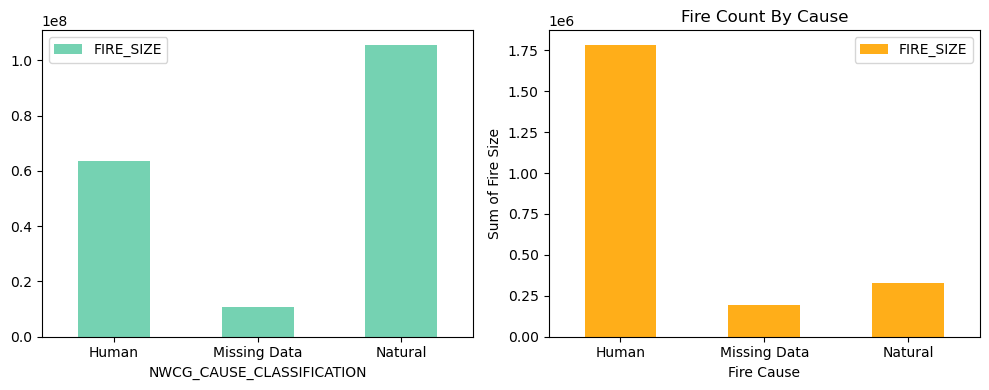

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

ax1 = fire_size_cause_df.plot.bar(color="mediumaquamarine", alpha=0.90, align="center", ax=axes[0])
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=0)
ax1.set_xticklabels(["Human","Missing Data","Natural"])
plt.title("Fire Size By Cause")
plt.xlabel("Fire Cause")
plt.ylabel("Sum of Fire Size")


ax2 = fire_count_cause_df.plot.bar(color="orange", alpha=0.90, align="center", ax=axes[1])
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=0)
ax2.set_xticklabels(["Human","Missing Data","Natural"])
plt.title("Fire Count By Cause")
plt.xlabel("Fire Cause")
plt.ylabel("Sum of Fire Size")

plt.tight_layout()

plt.show()

In [6]:
fire_count_year_query = pd.read_sql("SELECT SUM(FIRE_YEAR) FROM fires GROUP BY FIRE_YEAR", conn)

new_index_values = [1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 
                    2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020] 

fire_count_year_df = pd.DataFrame(fire_count_year_query.values, index=new_index_values)

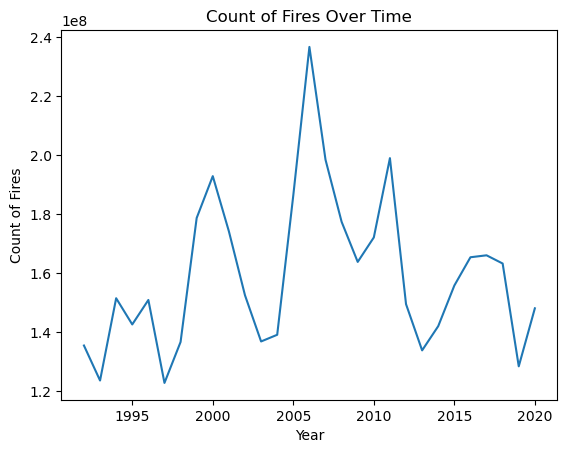

In [7]:
fire_count_year_df.plot(legend=False)

plt.title("Count of Fires Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Fires")

x_tick_num = [1995, 2000, 2005, 2010, 2015, 2020]

plt.xticks(x_tick_num)
plt.show()

In [9]:
# # Time checker
# start_time = time.time()
# print("--- %s seconds ---" % (time.time() - start_time))

In [10]:
# https://www.ncei.noaa.gov/access/services/search/
# v1/data?dataset=global-hourly&startDate=2016-01-01T00:00:00&endDate=2017-12-31T23:59:59&
# dataTypes=TMP&limit=10&offset=90

url = "https://www.ncei.noaa.gov/access/services/search/v1/data?"


dataset = "dataset=global-hourly&"

startdate = "startDate=1992-01-01T00:00:00&"

enddate = "endDate=2020-12-31T23:59:59&"

dtypes = "dataTypes=TMP&limit=10&offset=90"


query_url = url + dataset + startdate + enddate + dtypes
rain_response = requests.get(query_url)
rain_json = rain_response.json()

rain_formatted_str = json.dumps(rain_json, indent=2)

print(f"{rain_formatted_str}")

{
  "dataTypes": {
    "docCountError": 0,
    "buckets": [
      {
        "docCount": 294280,
        "key": "AA1"
      },
      {
        "docCount": 168815,
        "key": "AA2"
      },
      {
        "docCount": 62764,
        "key": "AA3"
      },
      {
        "docCount": 2206,
        "key": "AA4"
      },
      {
        "docCount": 24207,
        "key": "AB1"
      },
      {
        "docCount": 9593,
        "key": "AC1"
      },
      {
        "docCount": 21839,
        "key": "AD1"
      },
      {
        "docCount": 25986,
        "key": "AE1"
      },
      {
        "docCount": 82938,
        "key": "AG1"
      },
      {
        "docCount": 20166,
        "key": "AH1"
      },
      {
        "docCount": 20165,
        "key": "AH2"
      },
      {
        "docCount": 20164,
        "key": "AH3"
      },
      {
        "docCount": 20162,
        "key": "AH4"
      },
      {
        "docCount": 20107,
        "key": "AH5"
      },
      {
        "docCount": 20

In [8]:
# begin testing
# full_fire_df = pd.read_sql("SELECT FIRE_SIZE, NWCG_GENERAL_CAUSE, DISCOVERY_DOY FROM fires", conn)
full_fire_df = pd.read_sql("SELECT FIRE_SIZE, NWCG_GENERAL_CAUSE, DISCOVERY_DOY FROM fires", conn)
full_fire_df['FIRE_SIZE'] = full_fire_df['FIRE_SIZE'].multiply(100)
full_fire_df = full_fire_df.astype({'FIRE_SIZE':'int'})
full_fire_df

,FIRE_SIZE,NWCG_GENERAL_CAUSE,DISCOVERY_DOY
0,10,Power generation/transmission/distribution,33
1,25,Natural,133
2,10,Debris and open burning,152
3,10,Natural,180
4,10,Natural,180
...,...,...,...
2303561,100,Natural,157
2303562,10000,Missing data/not specified/undetermined,193
2303563,5000,Natural,240
2303564,2489200,Natural,230


In [9]:
# Event or circumstance that started a fire or set the stage for its occurrence (Arson/incendiarism, Debris and open burning, Equipment and vehicle use, Firearms and explosives use, Fireworks, Misuse of fire by a minor, Natural, Power generation/transmission/distribution, Railroad operations and maintenance, Recreation and ceremony, Smoking, Other causes, Missing data/not specified/undetermined).
mapping = {'Arson/incendiarism': 0, 'Debris and open burning': 1, 'Equipment and vehicle use': 2,
          'Firearms and explosives use': 3, 'Fireworks': 4, 'Misuse of fire by a minor': 5,
          'Natural': 6, 'Power generation/transmission/distribution': 7, 'Railroad operations and maintenance': 8,
          'Recreation and ceremony': 9, 'Smoking': 10, 'Other causes': 11, 'Missing data/not specified/undetermined': 12}
full_fire_df['NWCG_GENERAL_CAUSE'] = full_fire_df['NWCG_GENERAL_CAUSE'].replace(mapping)
full_fire_df

,FIRE_SIZE,NWCG_GENERAL_CAUSE,DISCOVERY_DOY
0,10,7,33
1,25,6,133
2,10,1,152
3,10,6,180
4,10,6,180
...,...,...,...
2303561,100,6,157
2303562,10000,12,193
2303563,5000,6,240
2303564,2489200,6,230


In [10]:
print(full_fire_df.columns.values.tolist())

['FIRE_SIZE', 'NWCG_GENERAL_CAUSE', 'DISCOVERY_DOY']


In [40]:
#=========================NO SCALE=======================#

y = full_fire_df['FIRE_SIZE']
X = full_fire_df.drop(['FIRE_SIZE'], axis=1)

In [41]:
from sklearn.model_selection import train_test_split


# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [ ]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_regression_model = logistic_regression_model.fit(X_train, y_train)

In [11]:
#=========================SCALING=======================#
from sklearn.preprocessing import StandardScaler

# Scaling the numeric columns
full_fire_scaled = StandardScaler().fit_transform(full_fire_df[["FIRE_SIZE", "NWCG_GENERAL_CAUSE", "DISCOVERY_DOY"]])

# Creating a DataFrame with with the scaled data
full_fire_scaled_df = pd.DataFrame(full_fire_scaled, columns=[["FIRE_SIZE", "NWCG_GENERAL_CAUSE", "DISCOVERY_DOY"]])

# Display sample data
full_fire_scaled_df.head()

,FIRE_SIZE,NWCG_GENERAL_CAUSE,DISCOVERY_DOY
0,-0.029672,0.319656,-1.481530
1,-0.029615,0.108043,-0.367358
2,-0.029672,-0.950024,-0.155665
3,-0.029672,0.108043,0.156303
4,-0.029672,0.108043,0.156303


In [12]:
y = full_fire_scaled_df['FIRE_SIZE']
X = full_fire_scaled_df.drop(['FIRE_SIZE'], axis=1)

/Users/derekprice/opt/anaconda3/lib/python3.9/site-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [13]:
from sklearn.model_selection import train_test_split


# Split the data using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [14]:
y_train.value_counts()

(FIRE_SIZE,)
-0.029672       434316
-0.029329       202506
-0.029519        99122
-0.028949        94507
-0.029634        63728
                 ...  
-0.013384            1
-0.013380            1
 0.459489            1
 0.459109            1
 251.867797          1
Length: 13487, dtype: int64

In [15]:
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
logistic_regression_model = LogisticRegression(random_state=1)

# Fit the model using training data
logistic_regression_model = logistic_regression_model.fit(X_train, y_train)

/Users/derekprice/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
/Users/derekprice/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Unknown label type: 'continuous'

In [ ]:
#Train
# classifier.fit(X_train, y_train)
# classifier.fit(X_train, y_train)

In [ ]:
session.close()